In [2]:
!pip install osmnx

Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyproj-3.7.2-cp311-cp311-win_amd64.whl.metadata (31 kB)
   ---------------------------------------- 0.0/101.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/101.5 kB ? eta -:--:--
   --------------- ----------------------- 41.0/101.5 kB 487.6 kB/s eta 0:00:01
   ----------------------------------- --- 92.2/101.5 kB 871.5 kB/s eta 0:00:01
   -------------------------------------- 101.5/101.5 kB 647.2 kB/s eta 0:00:00
Using cached geopandas-1.1.1-py3-none-any.whl (338 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 4.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.7 MB 2.2 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.7 MB 1.9 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import osmnx as ox
import geopandas as gpd
print (ox.__version__)

2.0.7


In [5]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
   ---------------------------------------- 0.0/93.9 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/93.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 93.9/93.9 kB 1.1 MB/s eta 0:00:00


In [6]:
import folium

<Axes: >

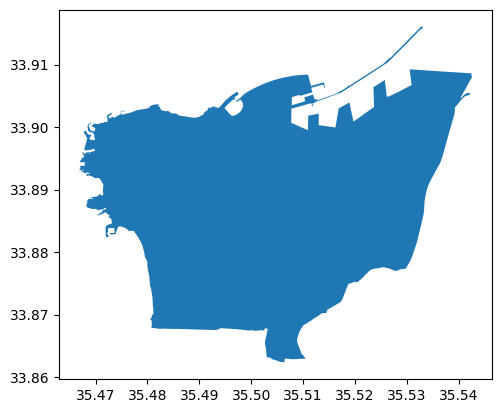

In [8]:
city_name = 'Beirut'
admin = ox.geocode_to_gdf(city_name)
admin.plot()

In [16]:
banks = ox.features_from_place(city_name, {"amenity":"bank"})

In [17]:
banks

geometry  \
element id                                                             
node    282454023                          POINT (35.50526 33.87749)   
        348353697                          POINT (35.50386 33.87799)   
        348976530                          POINT (35.51474 33.88765)   
        350432897                          POINT (35.52058 33.88814)   
        351573509                          POINT (35.51913 33.88706)   
...                                                              ...   
way     514515316  POLYGON ((35.51812 33.87916, 35.5184 33.87918,...   
        514515321  POLYGON ((35.51875 33.87943, 35.51864 33.8792,...   
        542304576  POLYGON ((35.48863 33.8957, 35.48921 33.8957, ...   
        555910507  POLYGON ((35.52413 33.88032, 35.52457 33.88048...   
        699461359  POLYGON ((35.48724 33.89884, 35.48738 33.89882...   

                         alt_name amenity  atm                    name  \
element id                                                               
node    282454023  لبنان و المهجر    bank  yes          لبنان و المهجر   
        348353697             NaN    bank  yes           لبنان للتجارة   
        348976530        فرنسابنك    bank  yes                فرنسابنك   
        350432897             NaN    bank  yes                    عودي   
        351573509             NaN    bank  yes                     NaN   
...                           ...     ...  ...                     ...   
way     514515316             NaN    bank  NaN               بنك بيروت   
        514515321             NaN    bank  yes  البنك اللبناني للتجارة   
        542304576             NaN    bank  NaN        مصرف لبنان بيروت   
        555910507             NaN    bank  NaN       الأعتماد اللبناني   
        699461359             NaN    bank  NaN               بنك بيروت   

                                  name:ar                    name:en  \
element id                                                             
node    282454023          لبنان و المهجر                  Blom Bank   
        348353697           لبنان للتجارة  Lebanese Bank of Commerce   
        348976530                فرنسابنك                 Fransabank   
        350432897                    عودي                  Bank Audi   
        351573509                     NaN                        NaN   
...                                   ...                        ...   
way     514515316               بنك بيروت             Bank of Beirut   
        514515321  البنك اللبناني للتجارة                   BLC Bank   
        542304576        مصرف لبنان بيروت    Central Bank of Lebanon   
        555910507       الأعتماد اللبناني       Bank Credit Libanais   
        699461359               بنك بيروت             Bank of Beirut   

                                      name:fr wheelchair    operator  ...  \
element id                                                            ...   
node    282454023                   Blom Bank        NaN         NaN  ...   
        348353697  Libanaise pour le Commerce         no         NaN  ...   
        348976530                  Fransabank        NaN  Fransabank  ...   
        350432897                 Banque Audi        NaN         NaN  ...   
        351573509                         NaN        NaN         NaN  ...   
...                                       ...        ...         ...  ...   
way     514515316                         NaN        NaN   بنك بيروت  ...   
        514515321                         NaN        NaN         NaN  ...   
        542304576    Banque Centrale du Liban        NaN         NaN  ...   
        555910507                         NaN        NaN         NaN  ...   
        699461359          Banque de Beyrouth        NaN   بنك بيروت  ...   

                  official_name official_name:ar     building building:levels  \
element id                                                                      
node    282454023           NaN              NaN          N

<Axes: >

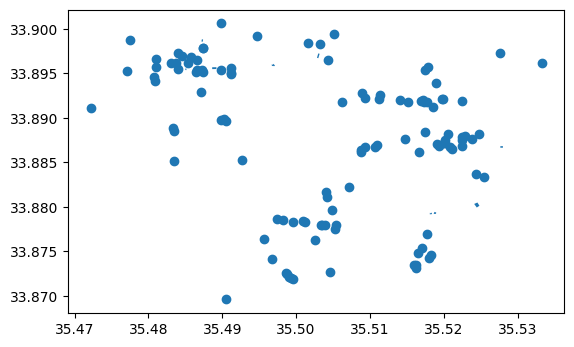

In [18]:
banks.plot()

In [19]:
police = ox.features_from_place(city_name, {"amenity":"police"})

In [20]:
atm = ox.features_from_place(city_name, {"amenity":"atm"})

In [21]:
print("Banks: ", len(banks), " | ATM: ", len(atm), " | Police: ", len(police))

Banks:  126  | ATM:  30  | Police:  12


In [22]:
def to_points(gdf):
    if gdf.empty:
        return gdf
    return gdf.to_crs(3857).centroid.to_crs(4326).to_frame("geometry")

banks = to_points(banks)
atm = to_points(atm)
police = to_points(police)

In [23]:
minx, miny, maxx, maxy = admin.total_bounds
fit_bounds = [[miny, minx], [maxy, maxx]]
center = [(miny + maxy) / 2, (minx + maxx) / 2]

In [28]:
m = folium.Map(
    location = center,
    #zoom_start = 12,
    tiles = "CartoDB_dark_matter",
    control_scale = True
)

admin_layer = folium.FeatureGroup(name="Admin Boundary", show=True)

folium.GeoJson(
    admin,
    style_function=lambda feature: {
        "fillColor": "#ffffff",
        "color": "#ffffff",
        "weight": 3,
        "fillOpacity": 0.15
    }
).add_to(admin_layer)

admin_layer.add_to(m)

folium.LayerControl(collapsed=False, position='topright').add_to(m)

if fit_bounds:
    m.fit_bounds(fit_bounds)
    
m

In [30]:
m = folium.Map(
    location = center,
    #zoom_start = 12,
    tiles = "CartoDB_dark_matter",
    control_scale = True
)

admin_layer = folium.FeatureGroup(name="Admin Boundary", show=True)

bank_layer = folium.FeatureGroup(name="Banks", show=True)
atm_layer = folium.FeatureGroup(name="ATMs", show=True)
police_layer = folium.FeatureGroup(name="Police Stations", show=True)


folium.GeoJson(
    admin,
    style_function=lambda feature: {
        "fillColor": "#ffffff",
        "color": "#ffffff",
        "weight": 3,
        "fillOpacity": 0.15
    }
).add_to(admin_layer)


def add_points(gdf, feature_group, color):
    if gdf is not None and not gdf.empty:
        for _, row in gdf.iterrows():
            geom = row.geometry
            if geom is None:
                continue
            lat, lon = geom.y, geom.x
            folium.CircleMarker(
                location = [lat, lon],
                radius = 3,
                weight = 0.5,
                fill = True, 
                fill_opacity = 0.8, 
                color = color,
                fill_color = color,
            ).add_to(feature_group)

add_points(banks, bank_layer, "#ff9933")
add_points(atm, atm_layer, "#44e0ff")
add_points(police, police_layer, "#ff4444")


admin_layer.add_to(m)
bank_layer.add_to(m)
atm_layer.add_to(m)
police_layer.add_to(m)

folium.LayerControl(collapsed=False, position='topright').add_to(m)

if fit_bounds:
    m.fit_bounds(fit_bounds)
    
m